<center><h1>TensorFlow Regression - Admission Scores</h1></center>

The purpose of this project is to create a deep learning regression model that predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores). The hope here is to give further insight into the graduate admissions process to improve test prep strategy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

df = pd.read_csv('admissions_data.csv')

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


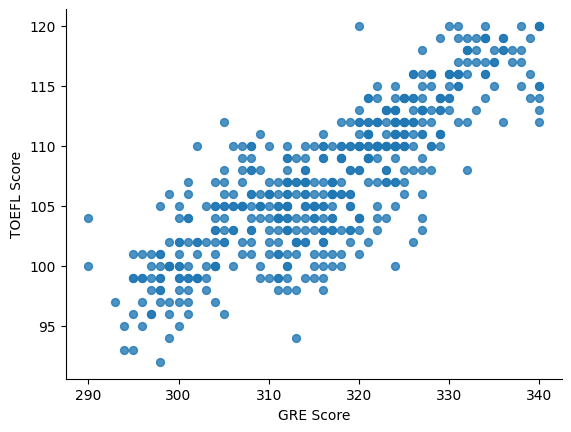

In [20]:
df.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Not surprisingly, students who do well on the TOEFL, will do well on the GRE.

In [3]:
df.shape

(500, 9)

In [4]:
# Here we want to define the target label and training features
features = df.iloc[:,0:-1]
labels = df.iloc[:,-1]

# Split the data into training and test data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=10)

Since some of the variables are on very different scales such as the University Rating and GRE Score, we will need to scale the dataset.

In [5]:
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [6]:
# Neural Network
def design_model(features: array):
  model = Sequential() # create the model
  num_features = features.shape[1] # number of features/dimensions in the dataset
  input = layers.InputLayer(input_shape=(num_features,)) # create an input layer
  model.add(input) # add an input layer
  model.add(Dense(64, activation='relu')) # add the first hidden layer with 64 neurons
  model.add(layers.Dropout(0.4))
  model.add(Dense(32, activation='relu')) # add the second hidden layer with 32 neurons
  model.add(layers.Dropout(0.2))
  model.add(Dense(1)) # add an output layer
  opt = Adam(learning_rate=0.01) # add an Adam optimizer with a learning rate of 0.01 (default)
  model.compile(loss='mse', # compile the model with an mse loss function and mae metric
                metrics=['mae'],
                optimizer=opt)
  return model

model = design_model(features_train_scale)

es = EarlyStopping(monitor='val_loss',
                     mode='min',
                     verbose=1,
                     patience=25)

history = model.fit(features_train_scale,
                    labels_train.to_numpy(), # this speed up the process since numpy arrays are faster
                    epochs=100,
                    batch_size=4,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[es])

val_mse, val_mae = model.evaluate(features_test_scale,
                                  labels_test.to_numpy(),
                                  verbose = 0)

print(f"""
      MSE: {val_mse} \n
      MAE: {val_mae}
      """)

Epoch 1/100
80/80 [==============================] - 1s 6ms/step - loss: 0.1388 - mae: 0.2878 - val_loss: 0.0430 - val_mae: 0.1861
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0310 - mae: 0.1441 - val_loss: 0.0105 - val_mae: 0.0891
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.0179 - mae: 0.1044 - val_loss: 0.0199 - val_mae: 0.1213
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0124 - mae: 0.0865 - val_loss: 0.0050 - val_mae: 0.0571
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 0.0079 - mae: 0.0716 - val_loss: 0.0048 - val_mae: 0.0589
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 0.0074 - mae: 0.0689 - val_loss: 0.0045 - val_mae: 0.0507
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.0071 - mae: 0.0673 - val_loss: 0.0049 - val_mae: 0.0547
Epoch 8/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0065 - m

#### Hyperparameter Tuning
Now lets play around and change some of the hyperparameters to see how it has changed. This is done manually and the following results are from the best run.

In [7]:
def design_model(features):
  model = Sequential() # create the model
  num_features = features.shape[1] # number of features/dimensions in the dataset
  input = layers.InputLayer(input_shape=(num_features,)) # create an input layer
  model.add(input) # add an input layer
  model.add(Dense(32, activation='relu')) # add the first hidden layer with 64 neurons
  model.add(layers.Dropout(0.4))
  model.add(Dense(16, activation='relu')) # add the second hidden layer with 32 neurons
  model.add(layers.Dropout(0.2))
  model.add(Dense(1)) # add an output layer
  opt = Adam(learning_rate=0.005) # add an Adam optimizer with a learning rate of 0.01 (default)
  model.compile(loss='mse', # compile the model with an mse loss function and mae metric
                metrics=['mae'],
                optimizer=opt)
  return model

model = design_model(features_train_scale)

es = EarlyStopping(monitor='val_loss',
                     mode='min',
                     verbose=1,
                     patience=15)

history = model.fit(features_train_scale,
                    labels_train.to_numpy(), # this speeds up the process since numpy arrays are faster
                    epochs=100,
                    batch_size=16,
                    verbose=1,
                    validation_split=0.30,
                    callbacks=[es])

val_mse, val_mae = model.evaluate(features_test_scale,
                                  labels_test.to_numpy(),
                                  verbose = 0)

print(f"""
      MSE: {val_mse} \n
      MAE: {val_mae}
      """)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.2770 - mae: 0.4128 - val_loss: 0.0667 - val_mae: 0.2207
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1303 - mae: 0.2981 - val_loss: 0.1019 - val_mae: 0.2921
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0965 - mae: 0.2547 - val_loss: 0.0454 - val_mae: 0.1882
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0678 - mae: 0.2097 - val_loss: 0.0456 - val_mae: 0.1921
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0557 - mae: 0.1965 - val_loss: 0.0314 - val_mae: 0.1559
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0443 - mae: 0.1735 - val_loss: 0.0289 - val_mae: 0.1523
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0388 - mae: 0.1614 - val_loss: 0.0281 - val_mae: 0.1505
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0278 - 

Now that we have a model that we are satisfied with, we can apply it to unseen data to make predictions and see how it performs.

4/4 [==============================] - 0s 5ms/step
0.746602813876542


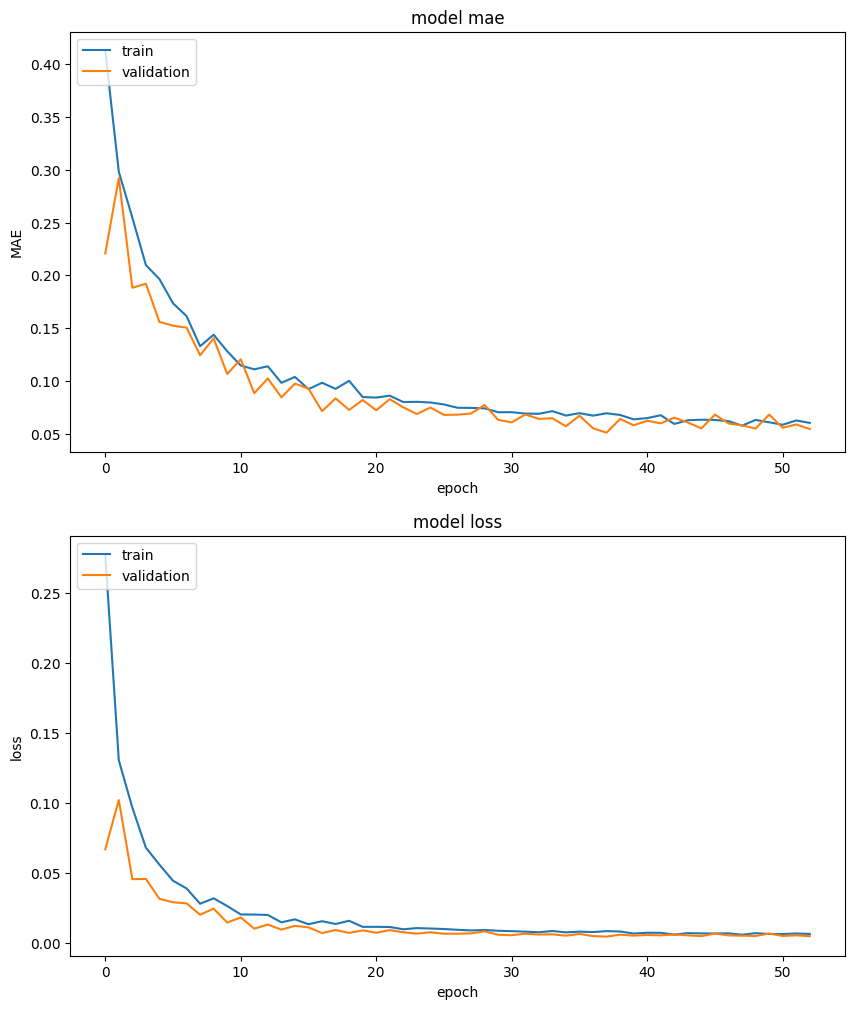

In [18]:
# Evauate r-squared score
y_pred = model.predict(features_test_scale)

print(r2_score(labels_test,y_pred))

# Plot MAE and val_MAE over each epoch
fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('Model MAE')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

This is around what we would expect given the results of the MAE and MSE, therefore this model can move forward and predict new/unseen students and ouptut a prediction of how likely they will get into grad school based on their test scores with very high accuracy. This graph tells us that our model should run at around 28 epochs (where the training and validation are essentially equal) given the set hyperparameters before the model starts overfitting.